## Base Social Network Analysis Statistics Using Python

### Creating the graph

In [1]:
# importing libs (already installed using Conda - see environment.yml)
from igraph import Graph, plot
import pandas as pd
import numpy as np

In [2]:
# creating sample graph, setting vertices and edges
g = Graph()
g.add_vertices(5)
g.vs["name"] = ["A", "B", "C", "D", "E"]
g.add_edges([("A","B"), ("B","C"), ("B","D"), ("D","C"), ("C","E")])
print(g)

IGRAPH UN-- 5 5 --
+ attr: name (v)
+ edges (vertex names):
A--B, B--C, B--D, C--D, C--E


In [3]:
# setting weights (later set as each edge_width), here an undirected graph with all weights equal
g.es["weight"]=[1,1,1,1,1]

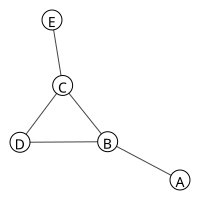

In [4]:
# configuring properties and plotting graph
layout = g.layout("kk")
visual_style = {}
visual_style["vertex_color"] = "white"
visual_style["vertex_size"] = 20
visual_style["vertex_label"] = ["A", "B", "C", "D", "E"]
visual_style["edge_width"] = g.es["weight"]
visual_style["bbox"] = (200,200)
plot(g, **visual_style)

### Extracting network metrics

In [5]:
g.density()

0.5

In [6]:
# degree of each vertex (from A to E)
g.degree()

[1, 3, 3, 2, 1]

In [7]:
# clustering coefficient (cc) of each vertex (from A to E)
g.transitivity_local_undirected()

[nan, 0.3333333333333333, 0.3333333333333333, 1.0, nan]

In [8]:
g.average_path_length()

1.6

In [9]:
# closeness of each vertex (from A to E)
g.closeness(weights=None, normalized=True)

[0.5, 0.8, 0.8, 0.6666666666666666, 0.5]

In [10]:
# betweenness of each vertex (from A to E)
g.betweenness(weights=None)

[0.0, 3.0, 3.0, 0.0, 0.0]

In [11]:
# eccentricity of each vertex (from A to E)
g.eccentricity()

[3.0, 2.0, 2.0, 2.0, 3.0]

In [12]:
g.diameter()

3

In [13]:
g.radius()

2

In [14]:
# articulation point (bridge) vertices (B and C, in this case)
g.articulation_points()

[1, 2]

### Enhacing the graph

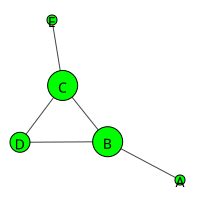

In [15]:
deg = g.degree()
vertex_size_list = [i*10 for i in deg]
plot(g, vertex_size=vertex_size_list, vertex_color=["green"], vertex_label=["A","B","C","D","E"], bbox=(200,200))

### Mounting descriptive table (dataframe)

In [16]:
names = ["A","B","C","D","E"]
degree = g.degree()
clustering_coefficient = g.transitivity_local_undirected()
closeness = g.closeness(weights=None, normalized=True)
betweenness = g.betweenness(weights=None)
eccentricity = g.eccentricity()
pd.DataFrame(np.column_stack([names, degree, clustering_coefficient, closeness, eccentricity]), 
             columns=["names","degree","clustering_coefficient","closeness","eccentricity"])

,names,degree,clustering_coefficient,closeness,eccentricity
0,A,1,nan,0.5,3.0
1,B,3,0.3333333333333333,0.8,2.0
2,C,3,0.3333333333333333,0.8,2.0
3,D,2,1.0,0.6666666666666666,2.0
4,E,1,nan,0.5,3.0


### Mounting descriptive table (Dataframe) using a custom function

In [17]:
# creating and calling a custom function that receives a Graph instance and a list of the respective id numbers of each vertice 
# in the graph (starting from zero)
def network_statistics(network_graph, node_id_list:list) -> pd.DataFrame:
    df = pd.DataFrame({"node_id":node_id_list})
    df["names"] = network_graph.vs["name"]
    df["degree"] = network_graph.degree()
    df["cc"] = network_graph.transitivity_local_undirected()
    df["closeness"] = network_graph.closeness(weights=None, normalized=True)
    df["betweenness"] = network_graph.betweenness()
    df["bridge"] = df["node_id"].isin(network_graph.articulation_points()).astype(int)
    return df

# calling the descriptor table passing the Graph instance g used before:
network_statistics = network_statistics(g, list(range(g.vcount())))
network_statistics

,node_id,names,degree,cc,closeness,betweenness,bridge
0,0,A,1,NaN,0.500000,0.0,0
1,1,B,3,0.333333,0.800000,3.0,1
2,2,C,3,0.333333,0.800000,3.0,1
3,3,D,2,1.000000,0.666667,0.0,0
4,4,E,1,NaN,0.500000,0.0,0
